In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/butler/Downloads/ufos/scrubbed.csv')


/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_10620/2461157267.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/butler/Downloads/ufos/scrubbed.csv')


In [3]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [5]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome', 'changed'],
      dtype=object)

In [6]:
df['shape'] = df['shape'].replace('changed', 'changing')
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome'], dtype=object)

In [7]:
df['shape'] = df['shape'].replace('other', 'unknown')
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'cigar', 'rectangle', 'chevron', 'triangle',
       'formation', nan, 'delta', 'changing', 'egg', 'diamond', 'flash',
       'teardrop', 'cone', 'cross', 'pyramid', 'round', 'crescent',
       'flare', 'hexagon', 'dome'], dtype=object)

In [8]:
df.isnull()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
80327,False,False,False,False,False,False,False,False,False,False,False
80328,False,False,False,False,False,False,False,False,False,False,False
80329,False,False,False,False,False,False,False,False,False,False,False
80330,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df['shape'] = df['shape'].fillna('other')

In [10]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'cigar', 'rectangle', 'chevron', 'triangle',
       'formation', 'other', 'delta', 'changing', 'egg', 'diamond',
       'flash', 'teardrop', 'cone', 'cross', 'pyramid', 'round',
       'crescent', 'flare', 'hexagon', 'dome'], dtype=object)

In [11]:
df.shape

(80332, 11)

In [12]:
df1 = pd.DataFrame()
df1["egg"] = df[df["shape"] == "egg"].value_counts()

In [13]:
df1.head()

,,,,,,,,,,,egg
datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,
1/1/2000 23:00,erath,la,us,egg,120,2:00,Yellow egg shape craft displays of technolegy,5/15/2006,29.9580556,-92.035833,1
6/29/2009 00:15,new york,ny,us,egg,300,5 min,For five minutes around midnight of 28 june we watched a silent slow-moving well-lit disc-shaped object moving from north to east..,8/5/2009,40.7141667,-74.006389,1
6/25/2006 07:00,victorville,ca,us,egg,900,15 min,Blue bugish oval with insect like undercarage and leaning one side top knot,7/16/2006,34.5361111,-117.290278,1
6/25/2008 00:00,surrey (canada),bc,ca,egg,120,2 minutes,Some guy told me you can call UFO&#39s&#44 I asked him to video it&#44 he did&#44 then I did. (Djice9),3/19/2009,49.136353351,-122.821343,1
6/27/2001 07:05,ann arbor,mi,us,egg,600,10 minutes,Translucent egg-shaped balloon like object in early morning sky in Ann Arbor&#44 MI.,8/5/2001,42.2708333,-83.726389,1


In [14]:
df['country'].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [15]:
df['country'].isnull().value_counts()

False    70662
True      9670
Name: country, dtype: int64

In [16]:
df['city'].unique()

array(['san marcos', 'lackland afb', 'chester (uk/england)', ...,
       'calmar (canada)', 'aleksandrow (poland)', 'hamstead (hollyridge)'],
      dtype=object)

In [17]:
df['city'].nunique()

19900

In [18]:
df['country'].isnull().value_counts()

False    70662
True      9670
Name: country, dtype: int64

In [19]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,10/10/1986 20:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795
...,...,...,...,...,...,...,...,...,...,...,...
80238,9/9/2009 14:15,broomfield?lafayette,co,NaN,rectangle,120.0,2 min,Large&#44 rectangular object seen flying in br...,12/12/2009,39.993596,-105.089706
80244,9/9/2009 20:17,lyman,me,NaN,light,600.0,10 mins,Two lights ran across the sky&#44 as bright as...,12/12/2009,43.505096,-70.637968
80319,9/9/2013 20:15,clifton,nj,NaN,unknown,3600.0,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
80322,9/9/2013 21:00,aleksandrow (poland),NaN,NaN,light,15.0,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


In [20]:
df['country'].isnull().value_counts()

False    70662
True      9670
Name: country, dtype: int64

In [21]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,10/10/1986 20:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795
...,...,...,...,...,...,...,...,...,...,...,...
80238,9/9/2009 14:15,broomfield?lafayette,co,NaN,rectangle,120.0,2 min,Large&#44 rectangular object seen flying in br...,12/12/2009,39.993596,-105.089706
80244,9/9/2009 20:17,lyman,me,NaN,light,600.0,10 mins,Two lights ran across the sky&#44 as bright as...,12/12/2009,43.505096,-70.637968
80319,9/9/2013 20:15,clifton,nj,NaN,unknown,3600.0,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
80322,9/9/2013 21:00,aleksandrow (poland),NaN,NaN,light,15.0,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


In [22]:
df.loc[df.state == 'il', 'country'] = 'us'
df.loc[df.state == 'ky', 'country'] = 'us'
df.loc[df.state == 'mo', 'country'] = 'us'
df.loc[df.state == 'ma', 'country'] = 'us'
df.loc[df.state == 'mi', 'country'] = 'us'
df.loc[df.state == 'nh', 'country'] = 'us'
df.loc[df.state == 'al', 'country'] = 'us'
df.loc[df.state == 'ak', 'country'] = 'us'
df.loc[df.state == 'ar', 'country'] = 'us'
df.loc[df.state == 'ca', 'country'] = 'us'
df.loc[df.state == 'co', 'country'] = 'us'
df.loc[df.state == 'la', 'country'] = 'us'
df.loc[df.state == 'mn', 'country'] = 'us'
df.loc[df.state == 'ms', 'country'] = 'us'
df.loc[df.state == 'mt', 'country'] = 'us'
df.loc[df.state == 'ne', 'country'] = 'us'
df.loc[df.state == 'ma', 'country'] = 'us'
df.loc[df.state == 'mi', 'country'] = 'us'
df.loc[df.state == 'nh', 'country'] = 'us'
df.loc[df.state == 'nj', 'country'] = 'us'
df.loc[df.state == 'nd', 'country'] = 'us'
df.loc[df.state == 'ny', 'country'] = 'us'
df.loc[df.state == 'oh', 'country'] = 'us'
df.loc[df.state == 'ok', 'country'] = 'us'
df.loc[df.state == 'or', 'country'] = 'us'
df.loc[df.state == 'pr', 'country'] = 'us'
df.loc[df.state == 'ri', 'country'] = 'us'
df.loc[df.state == 'sc', 'country'] = 'us'
df.loc[df.state == 'tn', 'country'] = 'us'
df.loc[df.state == 'ut', 'country'] = 'us'
df.loc[df.state == 'vt', 'country'] = 'us'
df.loc[df.state == 'vi', 'country'] = 'us'
df.loc[df.state == 'wa', 'country'] = 'us'
df.loc[df.state == 'wv', 'country'] = 'us'
df.loc[df.state == 'wi', 'country'] = 'us'
df.loc[df.state == 'wy', 'country'] = 'us'
df.loc[df.state == 'va', 'country'] = 'us'
df.loc[df.state == 'md', 'country'] = 'us'
df.loc[df.state == 'wi', 'country'] = 'us'
df.loc[df.state == 'pa', 'country'] = 'us'
df.loc[df.state == 'nm', 'country'] = 'us'
df.loc[df.state == 'ga', 'country'] = 'us'
df.loc[df.state == 'ma', 'country'] = 'us'
df.loc[df.state == 'mi', 'country'] = 'us'
df.loc[df.state == 'nh', 'country'] = 'us'
df.loc[df.state == 'al', 'country'] = 'us'
df.loc[df.state == 'ak', 'country'] = 'us'
df.loc[df.state == 'ar', 'country'] = 'us'
df.loc[df.state == 'co', 'country'] = 'us'
df.loc[df.state == 'la', 'country'] = 'us'
df.loc[df.state == 'mn', 'country'] = 'us'
df.loc[df.state == 'ms', 'country'] = 'us'
df.loc[df.state == 'mt', 'country'] = 'us'
df.loc[df.state == 'ne', 'country'] = 'us'
df.loc[df.state == 'ma', 'country'] = 'us'
df.loc[df.state == 'mi', 'country'] = 'us'
df.loc[df.state == 'nh', 'country'] = 'us'
df.loc[df.state == 'nj', 'country'] = 'us'
df.loc[df.state == 'nd', 'country'] = 'us'
df.loc[df.state == 'oh', 'country'] = 'us'
df.loc[df.state == 'ok', 'country'] = 'us'
df.loc[df.state == 'or', 'country'] = 'us'
df.loc[df.state == 'pr', 'country'] = 'us'
df.loc[df.state == 'ri', 'country'] = 'us'
df.loc[df.state == 'sc', 'country'] = 'us'
df.loc[df.state == 'tn', 'country'] = 'us'
df.loc[df.state == 'ut', 'country'] = 'us'
df.loc[df.state == 'vt', 'country'] = 'us'
df.loc[df.state == 'vi', 'country'] = 'us'
df.loc[df.state == 'wa', 'country'] = 'us'
df.loc[df.state == 'wv', 'country'] = 'us'
df.loc[df.state == 'wi', 'country'] = 'us'
df.loc[df.state == 'wy', 'country'] = 'us'
df.loc[df.state == 'tx', 'country'] = 'us'

df.loc[df.state == 'fl', 'country'] = 'us'
df.loc[df.state == 'nj', 'country'] = 'us'
df.loc[df.state == 'me', 'country'] = 'us'
df.loc[df.state == 'nc', 'country'] = 'us'
df.loc[df.state == 'co', 'country'] = 'us'
df.loc[df.state == 'az', 'country'] = 'us'


In [23]:
df[df['country'].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
55,10/10/1993 03:00,zlatoust (russia),NaN,NaN,sphere,1200,20 minutes,I woke up at night and looked out the window n...,12/14/2004,55.183333,59.650000
65,10/10/1996 20:00,lake macquarie (nsw&#44 australia),NaN,NaN,light,300,5 min,RED LIGHT WITH OTHER RED FLASHING LIGHT&#44 ON...,5/24/1999,-33.093373,151.588982
...,...,...,...,...,...,...,...,...,...,...,...
80157,9/9/2002 19:30,thailand (northeast),NaN,NaN,changing,600.0,5-10 mins,you can see or documented another type ball of...,10/15/2002,15.870032,100.992541
80190,9/9/2004 21:00,dubai (uae),NaN,NaN,disk,15.0,15 secs,silver&#44 disk shaped object with lights surr...,9/29/2004,25.047664,55.181741
80194,9/9/2004 21:45,krimpen a/d ijssel (netherlands),NaN,NaN,light,5.0,5 sec,Two fast as a couple moving red lights,9/29/2004,51.915929,4.600337
80204,9/9/2005 21:00,sault ste. marie (canada),on,NaN,unknown,10.0,5 to 10 seconds,I witnessed a low-flying&#44 flat and round&#4...,10/11/2005,46.521858,-84.346090


In [24]:
df.drop(['duration (hours/min)', 'latitude', 'longitude '], axis=1, inplace=True)
df.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,4/27/2004
1,10/10/1949 21:00,lackland afb,tx,us,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,1/21/2008
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,1/17/2004
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004


In [25]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'comments', 'date posted'],
      dtype='object')

In [26]:
df.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,4/27/2004
1,10/10/1949 21:00,lackland afb,tx,us,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,1/21/2008
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,1/17/2004
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004


In [27]:
df.tail()

,datetime,city,state,country,shape,duration (seconds),comments,date posted
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,Round from the distance/slowly changing colors...,9/30/2013
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013
80329,9/9/2013 22:00,napa,ca,us,unknown,1200.0,Napa UFO&#44,9/30/2013
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,Saw a five gold lit cicular craft moving fastl...,9/30/2013
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013


In [28]:
df.drop(['comments', 'date posted'], axis=1, inplace=True)

In [29]:
df.head()

,datetime,city,state,country,shape,duration (seconds)
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700
1,10/10/1949 21:00,lackland afb,tx,us,light,7200
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20
3,10/10/1956 21:00,edna,tx,us,circle,20
4,10/10/1960 20:00,kaneohe,hi,us,light,900


In [30]:
df.tail()

,datetime,city,state,country,shape,duration (seconds)
80327,9/9/2013 21:15,nashville,tn,us,light,600.0
80328,9/9/2013 22:00,boise,id,us,circle,1200.0
80329,9/9/2013 22:00,napa,ca,us,unknown,1200.0
80330,9/9/2013 22:20,vienna,va,us,circle,5.0
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020.0


In [31]:
a = []
m = []
for i in range(80332):
    d = df.iloc[i,0] 
    if '/' in d[0:2]:
        m.append(int((d[0])))
        if '/' in d[2:4]:
            a.append(int(d[4:8]))
            
        else:
            a.append(int(d[5:9]))
            
    else: 
        m.append(int(d[0:2]))
        if '/' in d[3:5]:
            a.append(int(d[5:9]))
            
        else:
            a.append(int(d[6:10]))

In [32]:
df['year'] = pd.Series(a)
df['month'] = pd.Series(m)

In [98]:
df['year'].unique()

array([1906, 1910, 1916, 1920, 1925, 1929, 1930, 1931, 1933, 1934, 1936,
       1937, 1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [100]:
df.sort_values('year', ascending=False)

,datetime,city,state,country,shape,duration (seconds),year,month,us,not_us
80331,3/13/2014 22:20,henderson,nv,us,light,1800,2014,3,True,False
80325,4/26/2014 21:00,santa cruz,ca,us,unknown,300,2014,4,True,False
80324,4/26/2014 21:10,louisville,ky,us,fireball,180,2014,4,True,False
79202,4/9/2014 00:15,pembroke,ma,us,triangle,3000,2014,4,True,False
80329,4/26/2014 19:00,gilbert,az,us,triangle,60,2014,4,True,False
...,...,...,...,...,...,...,...,...,...,...
4,6/11/1920 21:00,cicero,in,us,unknown,60,1920,6,True,False
3,4/5/1916 13:00,france (above; from aircraft),NaN,NaN,cigar,60,1916,4,False,True
2,1/1/1910 24:00,kirksville (near),mo,us,disk,120,1910,1,True,False
1,6/1/1910 15:00,wills point,tx,us,cigar,120,1910,6,True,False


In [102]:
df_year = df.iloc[:, 6:]

In [103]:
df_year.head()

,year,month,us,not_us
0,1906,11,False,True
1,1910,6,True,False
2,1910,1,True,False
3,1916,4,False,True
4,1920,6,True,False


In [113]:
df_year = df_year.iloc[:, :1]

In [126]:
df_year = df_year.sort_values('year')
df_year.head()

,year
0,1906
1,1910
2,1910
3,1916
4,1920


In [127]:
df_year.tail()

,year
78825,2014
78826,2014
79199,2014
78819,2014
80331,2014


In [133]:
df_year['year'] = df_year["year"].sort_values()

In [136]:
df_year['year']

0        1906
1        1910
2        1910
3        1916
4        1920
         ... 
78825    2014
78826    2014
79199    2014
78819    2014
80331    2014
Name: year, Length: 80332, dtype: int64

In [137]:
df_year['year'].value_counts()

2012    7357
2013    7037
2011    5107
2008    4820
2009    4541
        ... 
1929       1
1925       1
1920       1
1916       1
1906       1
Name: year, Length: 87, dtype: int64

In [140]:
df2014 = df_year[df_year['year'] == 2014].value_counts()

In [141]:
df2014

year
2014    2260
dtype: int64

In [134]:
df_year['year'].unique()

array([1906, 1910, 1916, 1920, 1925, 1929, 1930, 1931, 1933, 1934, 1936,
       1937, 1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [142]:
a = df["year"].value_counts()

In [148]:
a = a.sort_index()

In [149]:
a

1906       1
1910       2
1916       1
1920       1
1925       1
        ... 
2010    4283
2011    5107
2012    7357
2013    7037
2014    2260
Name: year, Length: 87, dtype: int64

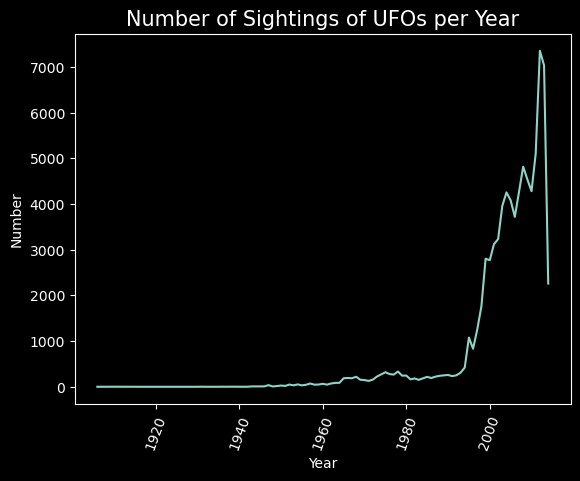

In [151]:
y = a
x = a.index

sns.set_palette("Set2")
plt.style.use("dark_background")
fig = sns.lineplot(x=x, y=y)
_ = fig.set_title("Number of Sightings of UFOs per Year", fontdict={'size': 15})
fig.set(xlabel = "Year", ylabel = "Number")

  


plt.xticks(rotation=70)
plt.show()

In [34]:
df.sort_values(by='year', inplace=True)
df.reset_index(drop=True, inplace=True)

In [35]:
df.head()

,datetime,city,state,country,shape,duration (seconds),year,month
0,11/11/1906 00:00,wien (austria),NaN,NaN,unknown,10800,1906,11
1,6/1/1910 15:00,wills point,tx,us,cigar,120,1910,6
2,1/1/1910 24:00,kirksville (near),mo,us,disk,120,1910,1
3,4/5/1916 13:00,france (above; from aircraft),NaN,NaN,cigar,60,1916,4
4,6/11/1920 21:00,cicero,in,us,unknown,60,1920,6


In [36]:
df.tail()

,datetime,city,state,country,shape,duration (seconds),year,month
80327,4/26/2014 20:43,whittier,ca,us,fireball,120,2014,4
80328,4/26/2014 20:15,riverside,nj,us,diamond,120,2014,4
80329,4/26/2014 19:00,gilbert,az,us,triangle,60,2014,4
80330,4/26/2014 17:00,greenwood,in,us,cross,20,2014,4
80331,3/13/2014 22:20,henderson,nv,us,light,1800,2014,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            80332 non-null  object
 1   city                80332 non-null  object
 2   state               74535 non-null  object
 3   country             75885 non-null  object
 4   shape               80332 non-null  object
 5   duration (seconds)  80332 non-null  object
 6   year                80332 non-null  int64 
 7   month               80332 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 4.9+ MB


In [38]:
df["us"] = df["country"] == "us"
df["not_us"] = df["country"] != "us"
df["us"].astype(int)
df["not_us"].astype(int)

0        1
1        0
2        0
3        1
4        0
        ..
80327    0
80328    0
80329    0
80330    0
80331    0
Name: not_us, Length: 80332, dtype: int64

In [39]:
df_us = df[df["country"] == 'us']
df_non_us = df[df["country"] != 'us']
df_us.reset_index(drop=True, inplace=True)
df_non_us.reset_index(drop=True, inplace=True)
df_us.head()

,datetime,city,state,country,shape,duration (seconds),year,month,us,not_us
0,6/1/1910 15:00,wills point,tx,us,cigar,120,1910,6,True,False
1,1/1/1910 24:00,kirksville (near),mo,us,disk,120,1910,1,True,False
2,6/11/1920 21:00,cicero,in,us,unknown,60,1920,6,True,False
3,12/28/1925 18:00,atkinson (6 miles north of),il,us,disk,60,1925,12,True,False
4,7/5/1929 14:00,buchanan (or burns),or,us,disk,60,1929,7,True,False


In [40]:
df_non_us.head()

,datetime,city,state,country,shape,duration (seconds),year,month,us,not_us
0,11/11/1906 00:00,wien (austria),NaN,NaN,unknown,10800,1906,11,False,True
1,4/5/1916 13:00,france (above; from aircraft),NaN,NaN,cigar,60,1916,4,False,True
2,9/15/1936 19:00,albany (canada),pe,ca,rectangle,1200.0,1936,9,False,True
3,6/1/1943 19:00,norfolk/sizewell (uk/england),NaN,NaN,cigar,600,1943,6,False,True
4,6/8/1943 14:00,france (over&#44 somewhere),NaN,NaN,light,300,1943,6,False,True


In [41]:
ycount_us = df_us['year'].value_counts()
ycount_us


2012    6699
2013    6439
2011    4720
2008    4291
2009    3941
        ... 
1933       1
1930       1
1929       1
1925       1
1920       1
Name: year, Length: 85, dtype: int64

In [42]:
ycount_non_us = df_non_us['year'].value_counts()
ycount_non_us

2003    775
2004    742
2012    658
2009    600
2013    598
       ... 
1948      1
1945      1
1916      1
1936      1
1906      1
Name: year, Length: 74, dtype: int64

In [43]:
year = df_us['year'].unique()

year_us = year[::-1]
year_us


array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971,
       1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960,
       1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949,
       1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1939, 1937, 1936,
       1934, 1933, 1931, 1930, 1929, 1925, 1920, 1910])

In [44]:
df_us_1950 = df_us[df_us['year'] < 1951]
year = df_us_1950['year'].unique()
year_us_1950 = year[::-1]
ycount_us_1950 = df_us_1950['year'].value_counts()
ycount_us_1950

1947    35
1950    26
1949    16
1946     8
1945     8
1948     7
1944     6
1943     5
1939     3
1937     2
1942     2
1931     2
1910     2
1920     1
1941     1
1936     1
1934     1
1933     1
1930     1
1929     1
1925     1
Name: year, dtype: int64

In [45]:
df_non_us_1950 = df_non_us[df_non_us['year'] < 1951]
year = df_non_us_1950['year'].unique()
year_non_us_1950 = year[::-1]

ycount_non_us_1950 = df_non_us_1950['year'].value_counts()
ycount_non_us_1950

1943    4
1944    3
1946    2
1947    2
1950    2
1906    1
1916    1
1936    1
1945    1
1948    1
Name: year, dtype: int64

In [46]:
df_non_us_1950

,datetime,city,state,country,shape,duration (seconds),year,month,us,not_us
0,11/11/1906 00:00,wien (austria),NaN,NaN,unknown,10800,1906,11,False,True
1,4/5/1916 13:00,france (above; from aircraft),NaN,NaN,cigar,60,1916,4,False,True
2,9/15/1936 19:00,albany (canada),pe,ca,rectangle,1200.0,1936,9,False,True
3,6/1/1943 19:00,norfolk/sizewell (uk/england),NaN,NaN,cigar,600,1943,6,False,True
4,6/8/1943 14:00,france (over&#44 somewhere),NaN,NaN,light,300,1943,6,False,True
5,8/13/1943 22:00,portsmouth (uk/england),NaN,gb,sphere,600.0,1943,8,False,True
6,1/18/1943 07:15,fiji islands (s. pacific ocean),NaN,NaN,other,10,1943,1,False,True
7,6/6/1944 01:00,france,NaN,NaN,cigar,1200,1944,6,False,True
8,4/15/1944 17:00,saanich (canada),bc,NaN,disk,120,1944,4,False,True
9,6/1/1944 19:00,penuela (puerto rico),NaN,NaN,circle,60,1944,6,False,True


In [47]:
year = df_non_us['year'].unique()
year_non_us = year[::-1]
year_non_us

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971,
       1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960,
       1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1948,
       1947, 1946, 1945, 1944, 1943, 1936, 1916, 1906])

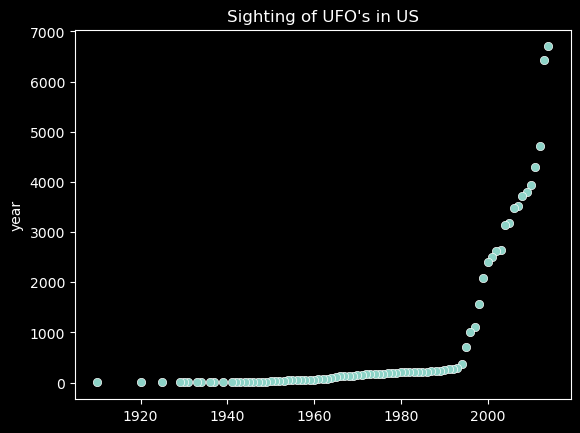

In [48]:
fig = sns.scatterplot(x=year_us, y=ycount_us).set(title="Sighting of UFO's in US")


In [49]:
type(ycount_non_us)

pandas.core.series.Series

In [50]:
ycount_non_us.head()

2003    775
2004    742
2012    658
2009    600
2013    598
Name: year, dtype: int64

In [51]:
df["us"].astype(int)
df["not_us"].astype(int)

0        1
1        0
2        0
3        1
4        0
        ..
80327    0
80328    0
80329    0
80330    0
80331    0
Name: not_us, Length: 80332, dtype: int64

In [52]:
df2 = pd.DataFrame()

df2["US"] = df_us["year"].value_counts()

df2["Other Countries"] = df_non_us["year"].value_counts()

df2["US"].astype(int)
df2["Other Countries"].isnull()
df2.fillna(value=0, inplace=True)


In [53]:
df2.isnull()

,US,Other Countries
2012,False,False
2013,False,False
2011,False,False
2008,False,False
2009,False,False
...,...,...
1933,False,False
1930,False,False
1929,False,False
1925,False,False


In [54]:
df2.head()

,US,Other Countries
2012,6699,658.0
2013,6439,598.0
2011,4720,387.0
2008,4291,529.0
2009,3941,600.0


In [55]:
df3 = pd.DataFrame()

df3["US"] = df_us_1950["year"].value_counts()
df3["Other Countries"] = df_non_us_1950["year"].value_counts()
df3["US"].astype(int)
df3["Other Countries"].isnull()
df3.fillna(value=0, inplace=True)

In [56]:
lst = [x for x in range(1910, 2015, 5)]
len(lst)

21

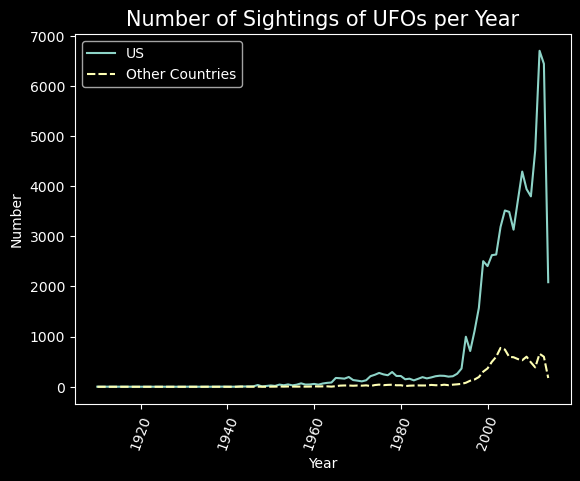

In [57]:
sns.set_palette("Set2")
plt.style.use("dark_background")
fig = sns.lineplot(data=df2)
_ = fig.set_title("Number of Sightings of UFOs per Year", fontdict={'size': 15})
fig.set(xlabel = "Year", ylabel = "Number")

  


plt.xticks(rotation=70)
plt.show()

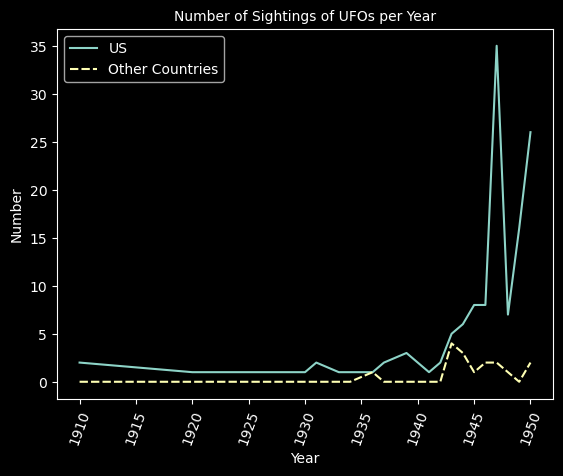

In [58]:

fig = sns.lineplot(data=df3, linestyle='-.')
_ = fig.set_title("Number of Sightings of UFOs per Year", fontdict={'size': 10})
fig.set(xlabel = "Year", ylabel = "Number")
plt.style.use("dark_background")
plt.xticks(rotation=70)
plt.show()

In [59]:
df2.reset_index(inplace=True, names='year')
df2.head()

,year,US,Other Countries
0,2012,6699,658.0
1,2013,6439,598.0
2,2011,4720,387.0
3,2008,4291,529.0
4,2009,3941,600.0


In [60]:
df2.sort_values("year", inplace=True)
x = df2["year"]
y = df2["US"]
y2 = df2["Other Countries"]


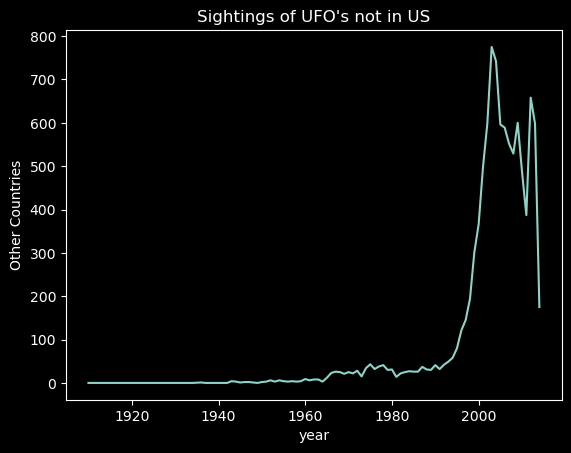

In [61]:
_ = sns.lineplot(x=df2['year'], y=df2['Other Countries']).set(title="Sightings of UFO's not in US")

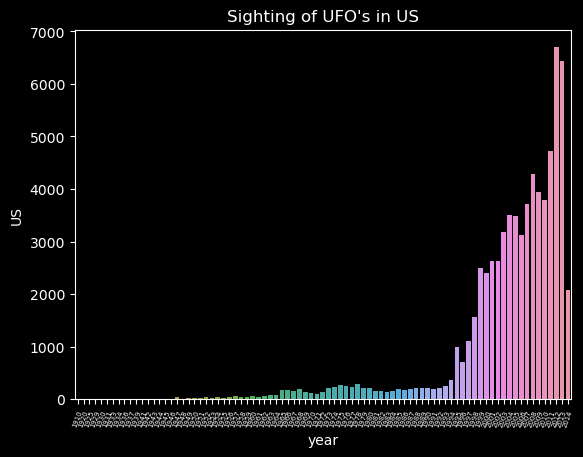

In [62]:



fig = sns.barplot(x=x, y=y)
_ = fig.set(title="Sighting of UFO's in US")
_ = fig.set_xticklabels(x, fontsize=5, rotation=70)

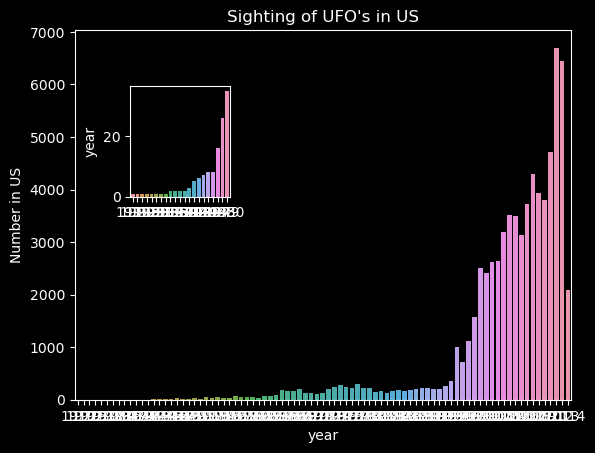

In [63]:
df2["Number in US"] = df2['US']

y = df2["Number in US"]
fig, ax = plt.subplots()


fig1 = sns.barplot(x=x,y=y).set(title="Sighting of UFO's in US")

  

axins = inset_axes(ax,  "20%", "30%" ,loc="upper left", borderpad=4)

fig2 = sns.barplot(x=year_us_1950,y=ycount_us_1950)



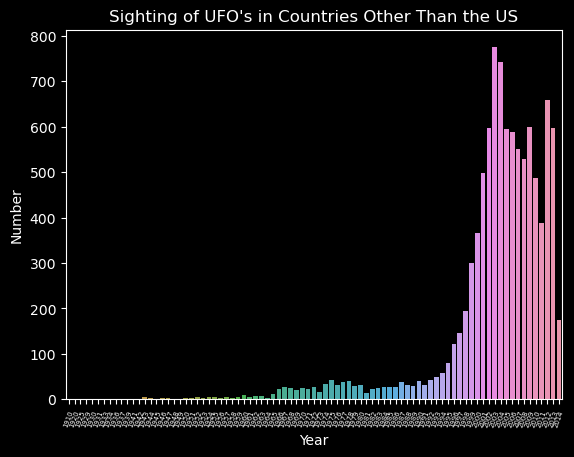

In [64]:


fig = sns.barplot(x=x, y=y2,)
_ = fig.set_xticklabels(x, fontsize=5, rotation=70)
_ = fig.set(xlabel = "Year", ylabel = "Number")
_ = fig.set(title="Sighting of UFO's in Countries Other Than the US")

In [65]:
df["shape"].unique()

array(['unknown', 'cigar', 'disk', 'triangle', 'oval', 'light',
       'rectangle', 'cylinder', 'sphere', 'fireball', 'other', 'circle',
       'formation', 'flash', 'chevron', 'egg', 'cone', 'changing',
       'diamond', 'teardrop', 'cross', 'delta', 'round', 'dome',
       'crescent', 'flare', 'pyramid', 'hexagon'], dtype=object)

In [66]:
y = df["shape"].value_counts()
y


light        16565
unknown      11233
triangle      7865
circle        7608
fireball      6208
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1963
other         1932
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
dome             1
flare            1
pyramid          1
hexagon          1
Name: shape, dtype: int64

In [67]:
type(y)

pandas.core.series.Series

In [68]:
y


light        16565
unknown      11233
triangle      7865
circle        7608
fireball      6208
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1963
other         1932
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
dome             1
flare            1
pyramid          1
hexagon          1
Name: shape, dtype: int64

In [69]:
type(y)

pandas.core.series.Series

In [70]:
y

light        16565
unknown      11233
triangle      7865
circle        7608
fireball      6208
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1963
other         1932
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
dome             1
flare            1
pyramid          1
hexagon          1
Name: shape, dtype: int64

In [71]:
y = y.reset_index(name="shapes")
y

,index,shapes
0,light,16565
1,unknown,11233
2,triangle,7865
3,circle,7608
4,fireball,6208
5,sphere,5387
6,disk,5213
7,oval,3733
8,formation,2457
9,cigar,2057


In [72]:
y = y[y["shapes"] > 1500]
y = y.drop(index=[1,11])

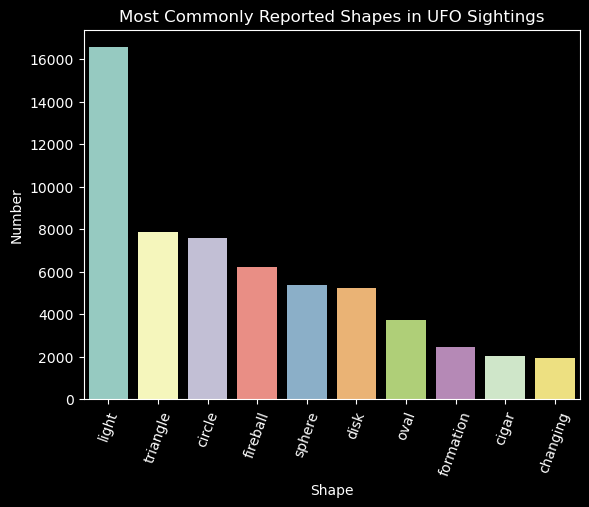

In [73]:
sns.set_palette("Set2")
plt.style.use("dark_background")
fig = sns.barplot(x=y["index"],y=y["shapes"])
_ = fig.set_xticklabels(y["index"], fontsize=10, rotation=70)
_ = fig.set(xlabel = "Shape", ylabel = "Number")
_ = fig.set(title="Most Commonly Reported Shapes in UFO Sightings")

In [74]:
df_2000 = pd.DataFrame()
df_2000 = df[df["year"] > 2000]
df_1960_70 = pd.DataFrame()
df_1960_70 = df[df["year"] > 1960]
df_1960_70 = df_1960_70[df_1960_70["year"] < 1970]
y = df_2000["shape"].value_counts()
y2 = df_1960_70["shape"].value_counts()

In [75]:
y

light        13720
unknown       8715
circle        6189
triangle      5916
fireball      5124
sphere        4235
disk          3097
oval          2865
formation     1995
changing      1623
cigar         1404
flash         1137
rectangle      986
cylinder       972
diamond        929
other          818
chevron        708
teardrop       625
egg            545
cone           254
cross          197
Name: shape, dtype: int64

In [76]:
y = y.reset_index(name="shapes")
y = y.sort_values("index")
y

,index,shapes
9,changing,1623
16,chevron,708
10,cigar,1404
2,circle,6189
19,cone,254
20,cross,197
13,cylinder,972
14,diamond,929
6,disk,3097
18,egg,545


In [77]:

y = y.drop(index=[1,15])

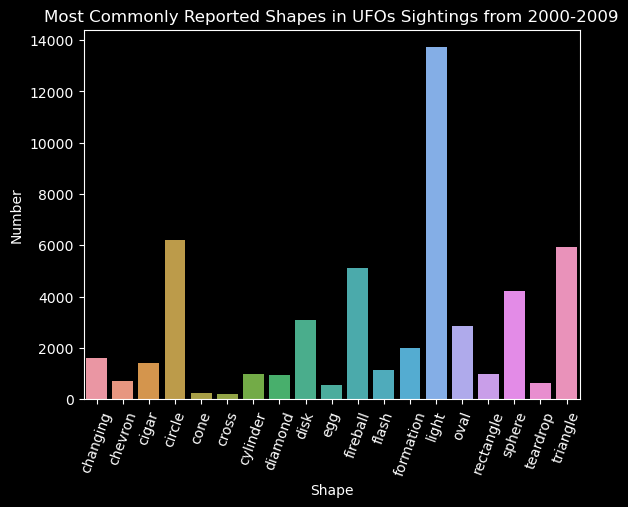

In [78]:
sns.set_palette("Set2")
plt.style.use("dark_background")
fig = sns.barplot(x=y["index"],y=y["shapes"])
_ = fig.set_xticklabels(y["index"], fontsize=10, rotation=70)
_ = fig.set(xlabel = "Shape", ylabel = "Number")
_ = fig.set(title="Most Commonly Reported Shapes in UFOs Sightings from 2000-2009")

In [79]:
y2

disk         301
unknown      171
light        148
circle       127
sphere        99
cigar         88
oval          84
triangle      55
fireball      34
cylinder      22
formation     21
other         17
changing      15
egg           14
diamond       11
chevron        9
rectangle      9
flash          6
teardrop       4
cross          2
cone           2
Name: shape, dtype: int64

In [80]:
y2 = y2.reset_index(name="shapes")
y2 = y2.sort_values("index")
y2

,index,shapes
12,changing,15
15,chevron,9
5,cigar,88
3,circle,127
20,cone,2
19,cross,2
9,cylinder,22
14,diamond,11
0,disk,301
13,egg,14


In [81]:

y2 = y2.drop(index=[1,11])


In [82]:
df_com = pd.DataFrame()
df_com["1960"] = y2["shapes"]
df_com["2000"] = y["shapes"]
df_com["shapes"] = y["index"]
df_com


,1960,2000,shapes
12,15,986.0,rectangle
15,9,NaN,NaN
5,88,4235.0,sphere
3,127,5916.0,triangle
20,2,197.0,cross
19,2,254.0,cone
9,22,1623.0,changing
14,11,929.0,diamond
0,301,13720.0,light
13,14,972.0,cylinder


In [83]:
df_com.drop(index=15, inplace=True)

In [84]:
df_com.set_index("shapes", inplace=True)

In [85]:
df_com

,1960,2000
shapes,,
rectangle,15,986.0
sphere,88,4235.0
triangle,127,5916.0
cross,2,197.0
cone,2,254.0
changing,22,1623.0
diamond,11,929.0
light,301,13720.0
cylinder,14,972.0


In [86]:
df_com = df_com.reset_index()
df_com["1960"] = df_com["1960"]/df_com["1960"].sum()
df_com["2000"] = df_com["2000"]/df_com["2000"].sum()
df_com

,shapes,1960,2000
0,rectangle,0.014395,0.019189
1,sphere,0.084453,0.082419
2,triangle,0.121881,0.115133
3,cross,0.001919,0.003834
4,cone,0.001919,0.004943
5,changing,0.021113,0.031586
6,diamond,0.010557,0.018080
7,light,0.288868,0.267009
8,cylinder,0.013436,0.018916
9,formation,0.032630,0.038825


In [87]:
df_com = pd.melt(df_com, id_vars="shapes", value_vars=["1960","2000"])
df_com

,shapes,variable,value
0,rectangle,1960,0.014395
1,sphere,1960,0.084453
2,triangle,1960,0.121881
3,cross,1960,0.001919
4,cone,1960,0.001919
5,changing,1960,0.021113
6,diamond,1960,0.010557
7,light,1960,0.288868
8,cylinder,1960,0.013436
9,formation,1960,0.032630


In [88]:
df_com = df_com[df_com["value"] >0.05]
df_com.sort_values("value", ascending=False, inplace=True)

/var/folders/nv/lggm200n09vgfy5n8_6lcz6c0000gn/T/ipykernel_10620/4527868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com.sort_values("value", ascending=False, inplace=True)


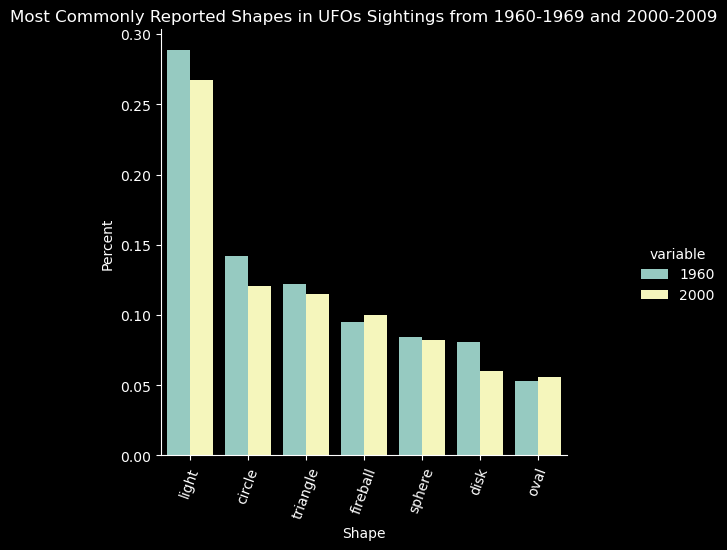

In [89]:
sns.set_palette("Set2")
plt.style.use("dark_background")

fig = sns.catplot(x="shapes", y="value", hue="variable", data=df_com, kind='bar')
_ = fig.set_xticklabels(fontsize=10, rotation=70)
_ = fig.set(xlabel = "Shape", ylabel = "Percent")
_ = fig.set(title="Most Commonly Reported Shapes in UFOs Sightings from 1960-1969 and 2000-2009")

In [90]:
from IPython.display import display, HTML

In [91]:
display(HTML(y.to_html()))

,index,shapes
9,changing,1623
16,chevron,708
10,cigar,1404
2,circle,6189
19,cone,254
20,cross,197
13,cylinder,972
14,diamond,929
6,disk,3097
18,egg,545


In [92]:
df.sort_values("year", inplace=True)

In [93]:
df.head()

,datetime,city,state,country,shape,duration (seconds),year,month,us,not_us
0,11/11/1906 00:00,wien (austria),NaN,NaN,unknown,10800,1906,11,False,True
1,6/1/1910 15:00,wills point,tx,us,cigar,120,1910,6,True,False
2,1/1/1910 24:00,kirksville (near),mo,us,disk,120,1910,1,True,False
3,4/5/1916 13:00,france (above; from aircraft),NaN,NaN,cigar,60,1916,4,False,True
4,6/11/1920 21:00,cicero,in,us,unknown,60,1920,6,True,False


In [94]:
df4 = pd.DataFrame()
df4["cigar"] = (df["shape"] == "cigar")
df4["year"] = df["year"]
df4["cigar"] = df4["cigar"].astype(int)

df4.head()

,cigar,year
0,0,1906
1,1,1910
2,0,1910
3,1,1916
4,0,1920


In [95]:
df_cigar = df4[df4["cigar"] != 0]
df_cigar.head()

,cigar,year
1,1,1910
3,1,1916
12,1,1936
22,1,1943
33,1,1944


In [96]:
y_cigar = df_cigar["year"].value_counts()
x_cigar = df_cigar["year"].unique()

In [97]:
_ = sns.scatterplot(x=x , y=y)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:
_ = sns.lineplot(x=x , y=y)

In [ ]:
df4["disk"] = df["shape"] == "disk"

df4["disk"] = df4["disk"].astype(int)

df4.head()




In [ ]:
df["shape"].unique()

In [ ]:
df_triangle = df[df["shape"] == "triangle"]
df_oval = df[df["shape"] == "oval"]

df_light = df[df["shape"] == "light"]
df_rectangle = df[df["shape"] == "rectangle"]
df_cylinder = df[df["shape"] == "cylinder"]
df_fireball = df[df["shape"] == "fireball"]
df_sphere = df[df["shape"] == "sphere"]
df_circle = df[df["shape"] == "circle"]
df_formation = df[df["shape"] == "formation"]
df_flash = df[df["shape"] == "flash"]
df_chevron = df[df["shape"] == "chevron"]
df_sphere = df[df["shape"] == "sphere"]
df_egg = df[df["shape"] == "egg"]
df_disk = df[df["shape"] == "disk"]
df_cone = df[df["shape"] == "cone"]
df_diamond = df[df["shape"] == "diamond"]
df_teardrop = df[df["shape"] == "teardrop"]
df_cross = df[df["shape"] == "cross"]
df_delta = df[df["shape"] == "delta"]
df_round = df[df["shape"] == "round"]
df_dome = df[df["shape"] == "dome"]
df_crescent = df[df["shape"] == "crescent"]
df_hexagon = df[df["shape"] == "hexagon"]
df_pyramid = df[df["shape"] == "pyramid"]
df_flare = df[df["shape"] == "flare"]
df_unknown = df[df["shape"] == "unknown"]
df_other = df[df["shape"] == "other"]
df_changing = df[df["shape"] == "changing"]


In [ ]:
df_egg.head()

In [ ]:

x = df_egg["year"].unique()
y = df_egg["year"].value_counts()
fig = sns.lineplot(x=x, y=y)
_ = fig.set(title="Number of UFO Sighting Which Were Described as Eggs", xlabel="Year", ylabel="Number")

In [ ]:
x = df_sphere["year"].unique()
y = df_sphere["year"].value_counts()
fig = sns.lineplot(x=x, y=y)
_ = fig.set(title="Number of UFO Sighting Which Were Described as Spheres", xlabel="Year", ylabel="Number")


In [ ]:
df["shape"].unique()

In [ ]:
df_bar_shape = pd.DataFrame()
df_bar_shape["egg"] = df_egg["year"].value_counts()
df_bar_shape["sphere"] = df_sphere["year"].value_counts()
df_bar_shape["triangle"] = df_triangle["year"].value_counts()
df_bar_shape['chevron'] = df_chevron["year"].value_counts()
df_bar_shape['cigar'] = df_cigar["year"].value_counts()
df_bar_shape['fireball'] = df_fireball["year"].value_counts()
df_bar_shape['oval'] = df_oval["year"].value_counts()
df_bar_shape['disk'] = df_disk["year"].value_counts()
df_bar_shape['unknown'] = df_unknown["year"].value_counts()
df_bar_shape['light'] = df_light["year"].value_counts()
df_bar_shape['rectangle'] = df_rectangle["year"].value_counts()
df_bar_shape['cylinder'] = df_cylinder["year"].value_counts()
df_bar_shape['other'] = df_other["year"].value_counts()
df_bar_shape['circle'] = df_circle["year"].value_counts()
df_bar_shape['formation'] = df_formation["year"].value_counts()
df_bar_shape['flash'] = df_flash["year"].value_counts()
df_bar_shape['cone'] = df_cone["year"].value_counts()
df_bar_shape['teardrop'] = df_teardrop["year"].value_counts()
df_bar_shape['cross'] = df_cross["year"].value_counts()
df_bar_shape['delta'] = df_delta["year"].value_counts()
df_bar_shape['round'] = df_round["year"].value_counts()
df_bar_shape['dome'] = df_dome["year"].value_counts()
df_bar_shape['crescent'] = df_crescent["year"].value_counts()
df_bar_shape['hexagon'] = df_hexagon["year"].value_counts()
df_bar_shape['pyramid'] = df_pyramid["year"].value_counts()
df_bar_shape['flare'] = df_flare["year"].value_counts()

In [ ]:
df_bar_shape.head()

In [ ]:
df_bar_shape.isnull().value_counts()

In [ ]:
df_bar_shape =  df_bar_shape.fillna(0)
df_bar_shape.head()

In [ ]:
df_bar_shape.reset_index(names="year", inplace=True)


In [ ]:
df_bar_shape.head()

In [ ]:
df_bar_shape.sort_values("year", inplace=True)

In [ ]:
df_bar_shape.head()

In [ ]:
x = df_bar_shape["year"]
x.head()

In [ ]:
y = df_bar_shape.drop("year", axis=1)
y.tail()

In [ ]:
df_bar = df_bar_shape.value_counts()

In [ ]:
df_bar = pd.DataFrame()
df_bar["egg"] = df_bar_shape["egg"].value_counts()
df_bar["sphere"] = df_bar_shape["sphere"].value_counts()
df_bar["triangle"] = df_bar_shape["triangle"].value_counts()
df_bar['chevron'] = df_bar_shape["chevron"].value_counts()
df_bar['cigar'] = df_bar_shape["cigar"].value_counts()
df_bar['fireball'] = df_bar_shape["fireball"].value_counts()
df_bar['oval'] = df_bar_shape["oval"].value_counts()
df_bar['disk'] = df_bar_shape["disk"].value_counts()
df_bar['unknown'] = df_bar_shape["unknown"].value_counts()
df_bar['light'] = df_bar_shape["light"].value_counts()
df_bar['rectangle'] = df_bar_shape["rectangle"].value_counts()
df_bar['cylinder'] = df_bar_shape["cylinder"].value_counts()
df_bar['other'] = df_bar_shape["other"].value_counts()
df_bar['circle'] = df_bar_shape["circle"].value_counts()
df_bar['formation'] = df_bar_shape["formation"].value_counts()
df_bar['flash'] = df_bar_shape["flash"].value_counts()
df_bar['cone'] = df_bar_shape["cone"].value_counts()
df_bar['teardrop'] = df_bar_shape["teardrop"].value_counts()
df_bar['cross'] = df_bar_shape["cross"].value_counts()
df_bar['delta'] = df_bar_shape["delta"].value_counts()
df_bar['round'] = df_bar_shape["round"].value_counts()
df_bar['dome'] = df_bar_shape["dome"].value_counts()
df_bar['crescent'] = df_bar_shape["crescent"].value_counts()
df_bar['hexagon'] = df_bar_shape["hexagon"].value_counts()
df_bar['pyramid'] = df_bar_shape["pyramid"].value_counts()
df_bar['flare'] = df_bar_shape["flare"].count()

In [ ]:
df_bar.head(20)

In [ ]:
fig = sns.barplot(data=df_bar)